In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import os

# CSV 데이터 확인

## train.csv

In [2]:
train_df = pd.read_csv("./data/train.csv")
train_df

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1
...,...,...
17495,ffede47a74e47a5930f81c0b6896479e.jpg,0
17496,ffef6382a50d23251d4bc05519c91037.jpg,1
17497,fff059ecc91b30be5745e8b81111dc7b.jpg,1
17498,fff43acb3b7a23edcc4ae937be2b7522.jpg,0


In [19]:
train_df["has_cactus"].value_counts()

has_cactus_count = len(train_df[train_df["has_cactus"] == 1])
has_cactus_ratio = 100 * has_cactus_count / len(train_df)

not_has_cactus_count = len(train_df[train_df["has_cactus"] == 0])
not_has_cactus_ratio = 100 * not_has_cactus_count / len(train_df)

print(f"has cactus: {has_cactus_count}({has_cactus_ratio:.2f}%)")
print(f"not has cactus: {not_has_cactus_count}({not_has_cactus_ratio:.2f}%)")

has cactus: 13136(75.06%)
not has cactus: 4364(24.94%)


## sample_submission.csv

In [3]:
submission_df = pd.read_csv("./data/sample_submission.csv")
submission_df

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5
...,...,...
3995,ffaafd0c9f2f0e73172848463bc2e523.jpg,0.5
3996,ffae37344310a1549162493237d25d3f.jpg,0.5
3997,ffbd469c56873d064326204aac546e0d.jpg,0.5
3998,ffcb76b7d47f29ece11c751e5f763f52.jpg,0.5


# 이미지 데이터

In [22]:
train_file_names = os.listdir("./data/train")
test_file_names = os.listdir("./data/test")

print(f"train 데이터 수: {len(train_file_names)}")
print(f"test 데이터 수: {len(test_file_names)}")

train 데이터 수: 17500
test 데이터 수: 4000


In [71]:
# 이미지 형상
cv2.imread(f"./data/train/{train_file_names[0]}").shape

(32, 32, 3)

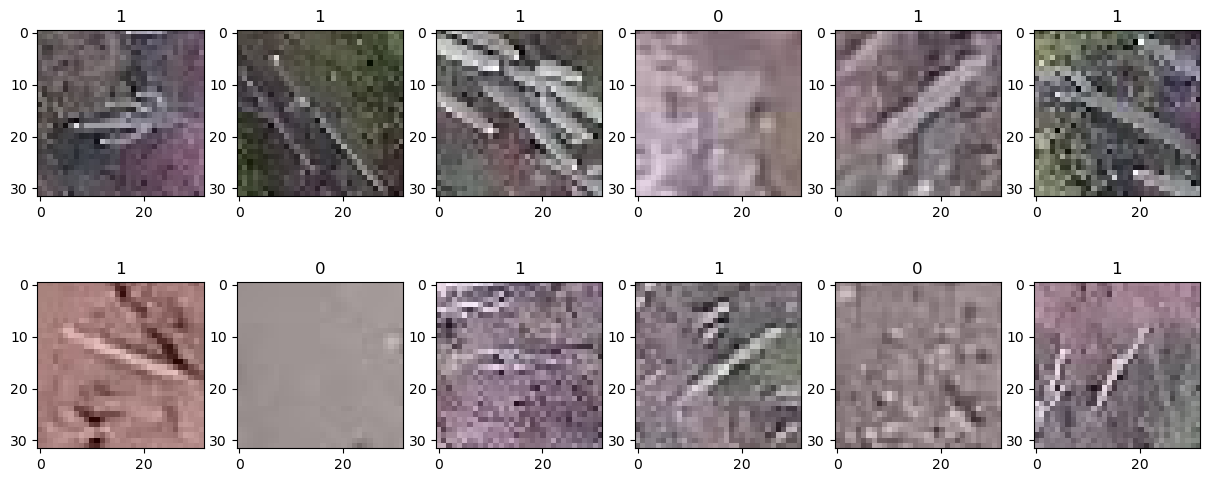

In [65]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 6))
grid = gridspec.GridSpec(2, 6)

for i, row in enumerate(train_df[-12:].itertuples()):
    image = cv2.imread(f"./data/train/{row.id}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax = plt.subplot(grid[i])
    ax.imshow(image)
    ax.set_title(row.has_cactus)